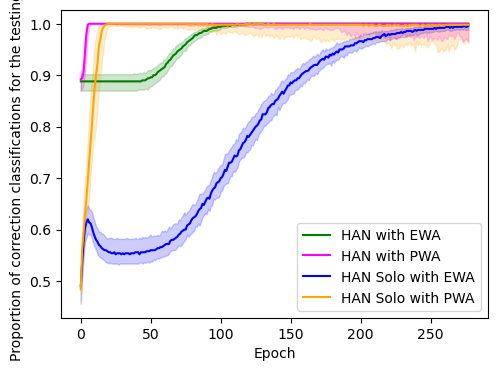

In [3]:
from hansolo import *
M_obj=500
M=2502
n_epoch = int(M/9)

Nb=100

level=0.1
learning="blocs"

plt.figure(figsize=(5.5,4))

legend=['HAN with EWA', 'HAN with PWA', 'HAN Solo with EWA', 'HAN Solo with PWA']
color=['green','magenta','blue','orange']

#answers=np.load(f'saves/PWA_{learning}_HAN_test.npy')

answers=np.zeros((4,Nb,n_epoch, M_obj))

answers[2,:,:,:]=np.load(f'/Users/sophiejaffard/Desktop/saves/EWA_{learning}_test.npy')
answers[3,:,:,:]=np.load(f'/Users/sophiejaffard/Desktop/saves/PWA_{learning}_test.npy')
answers[0,:,:,:]=np.load(f'/Users/sophiejaffard/Desktop/saves/EWA_{learning}_HAN_test.npy')
answers[1,:,:,:]=np.load(f'/Users/sophiejaffard/Desktop/saves/PWA_{learning}_HAN_test.npy')

for i in range(4):
    Y=np.zeros((Nb,n_epoch)) # percentage "glissant" of correct guesses for a bloc of 18 objects
    for nb in range(Nb):
        for m in range(n_epoch):
            Y[nb,m]=np.sum(answers[i,nb,m,:])/M_obj
    Y_med=np.zeros(n_epoch)
    Y_90=np.zeros(n_epoch)
    Y_10=np.zeros(n_epoch)

    for m in range(n_epoch):
        X=Y[:,m]
        X=np.sort(X)
        Y_med[m]=X[int(Nb/2)]
        Y_90[m]=X[int(Nb*(1-level))]
        Y_10[m]=X[int(Nb*level)]
   

    X2=np.arange(n_epoch)
    plt.plot(X2,Y_med,label=legend[i], color=color[i])
    plt.fill_between(X2, Y_10, Y_90, color=color[i], alpha=.2)

#plt.yticks([0.6,0.8,1])
#plt.xticks([500,1500,2500])
plt.ylabel('Proportion of correction classifications for the testing set')
plt.xlabel('Epoch')

plt.legend()
#plt.savefig('curves.pdf')
plt.show()

